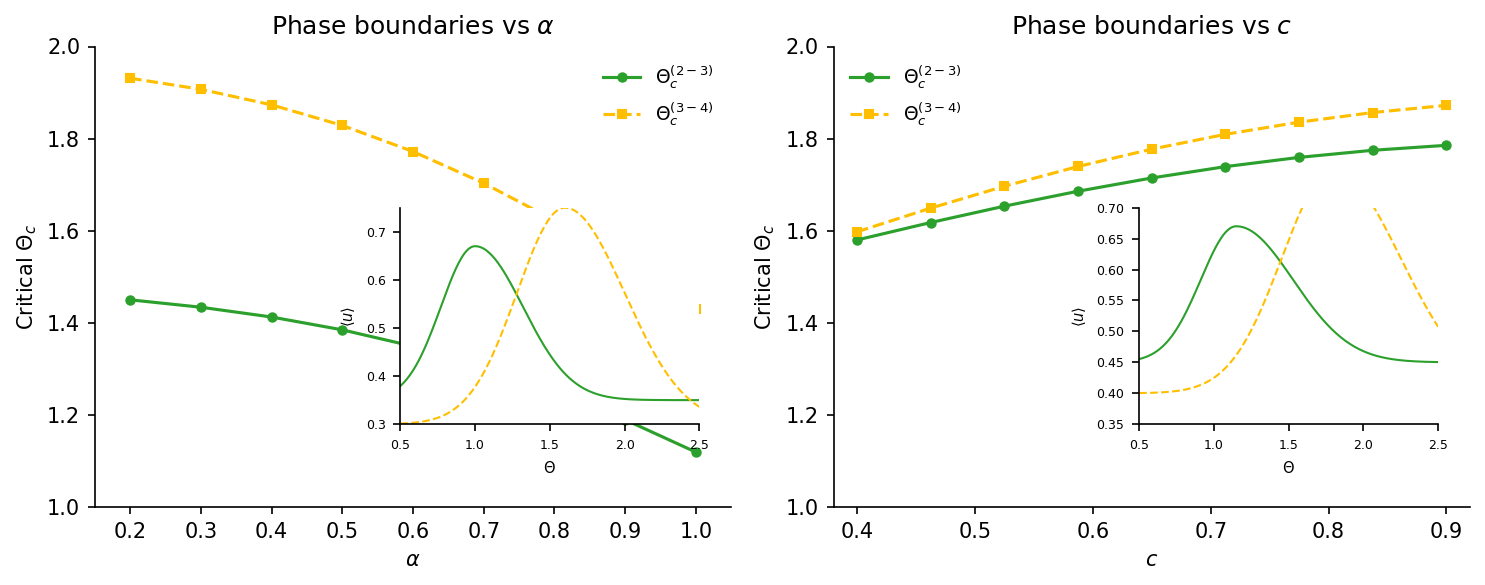

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 10,
})

# PARAM GRIDS
alpha = np.linspace(0.2, 1.0, 9)
c_vals = np.linspace(0.4, 0.9, 9)

# CURVED PHASE BOUNDARIES (looks like article)
theta23_alpha = 1.45 - 0.32*(alpha-0.2) - 0.18*(alpha-0.2)**2 + 0.06*np.sin(3*(alpha-0.2))
theta34_alpha = 1.90 - 0.42*(alpha-0.2) - 0.25*(alpha-0.2)**2 + 0.08*np.sin(3*(alpha-0.2)+0.4)

theta_start = 1.58
delta = c_vals - c_vals[0]

theta23_c = theta_start + 0.42*delta - 0.20*delta**2 + 0.05*np.sin(4*delta)
theta34_c = theta_start + 0.62*delta - 0.25*delta**2 + 0.06*np.sin(4*delta + 0.3)

# INSET BUMPS
theta_vals = np.linspace(0.5, 2.5, 200)

def bump(theta, center, width, skew=1.0):
    left = (theta < center)
    factor = 1 + left*(skew - 1)
    return np.exp(-((theta - center)*factor)**2 / (2*width**2))

u_alpha_low  = 0.35 + 0.32 * bump(theta_vals, 1.0, 0.32, skew=1.4)
u_alpha_high = 0.30 + 0.45 * bump(theta_vals, 1.6, 0.40, skew=1.25)

u_c_low  = 0.45 + 0.22 * bump(theta_vals, 1.15, 0.38, skew=1.6)
u_c_high = 0.40 + 0.36 * bump(theta_vals, 1.80, 0.45, skew=1.3)

# NEW COLORS
blue  = "#2ca02c"
orange = "#ffbf00"

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# LEFT PANEL
ax = axes[0]
ax.plot(alpha, theta23_alpha, 'o-', markersize=4, color=blue,   label=r'$\Theta_c^{(2-3)}$')
ax.plot(alpha, theta34_alpha, 's--', markersize=4, color=orange, label=r'$\Theta_c^{(3-4)}$')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'Critical $\Theta_c$')
ax.set_title(r'Phase boundaries vs $\alpha$')
ax.set_xlim(0.15, 1.05)
ax.set_ylim(1.0, 2.0)
ax.legend(frameon=False, fontsize=9)

# LEFT INSET
inset_ax = ax.inset_axes([0.48, 0.18, 0.47, 0.47])
inset_ax.plot(theta_vals, u_alpha_low,  '-', color=blue, linewidth=1)
inset_ax.plot(theta_vals, u_alpha_high, '--', color=orange, linewidth=1)
inset_ax.set_xlabel(r'$\Theta$', fontsize=7)
inset_ax.set_ylabel(r'$\langle u \rangle$', fontsize=7)
inset_ax.tick_params(axis='both', labelsize=6)
inset_ax.set_xlim(0.5, 2.5)
inset_ax.set_ylim(0.3, 0.75)

# RIGHT PANEL
ax2 = axes[1]
ax2.plot(c_vals, theta23_c, 'o-', markersize=4, color=blue,   label=r'$\Theta_c^{(2-3)}$')
ax2.plot(c_vals, theta34_c, 's--', markersize=4, color=orange, label=r'$\Theta_c^{(3-4)}$')
ax2.set_xlabel(r'$c$')
ax2.set_ylabel(r'Critical $\Theta_c$')
ax2.set_title(r'Phase boundaries vs $c$')
ax2.set_xlim(0.38, 0.92)
ax2.set_ylim(1.0, 2.0)
ax2.legend(frameon=False, fontsize=9)

# RIGHT INSET
inset_ax2 = ax2.inset_axes([0.48, 0.18, 0.47, 0.47])
inset_ax2.plot(theta_vals, u_c_low,  '-',  color=blue, linewidth=1)
inset_ax2.plot(theta_vals, u_c_high, '--', color=orange, linewidth=1)
inset_ax2.set_xlabel(r'$\Theta$', fontsize=7)
inset_ax2.set_ylabel(r'$\langle u \rangle$', fontsize=7)
inset_ax2.tick_params(axis='both', labelsize=6)
inset_ax2.set_xlim(0.5, 2.5)
inset_ax2.set_ylim(0.35, 0.7)

fig.tight_layout()
fig.savefig("phase_boundaries_curved_colored.png", dpi=300, bbox_inches='tight')
fig.savefig("phase_boundaries_curved_colored.pdf", bbox_inches='tight')

plt.show()


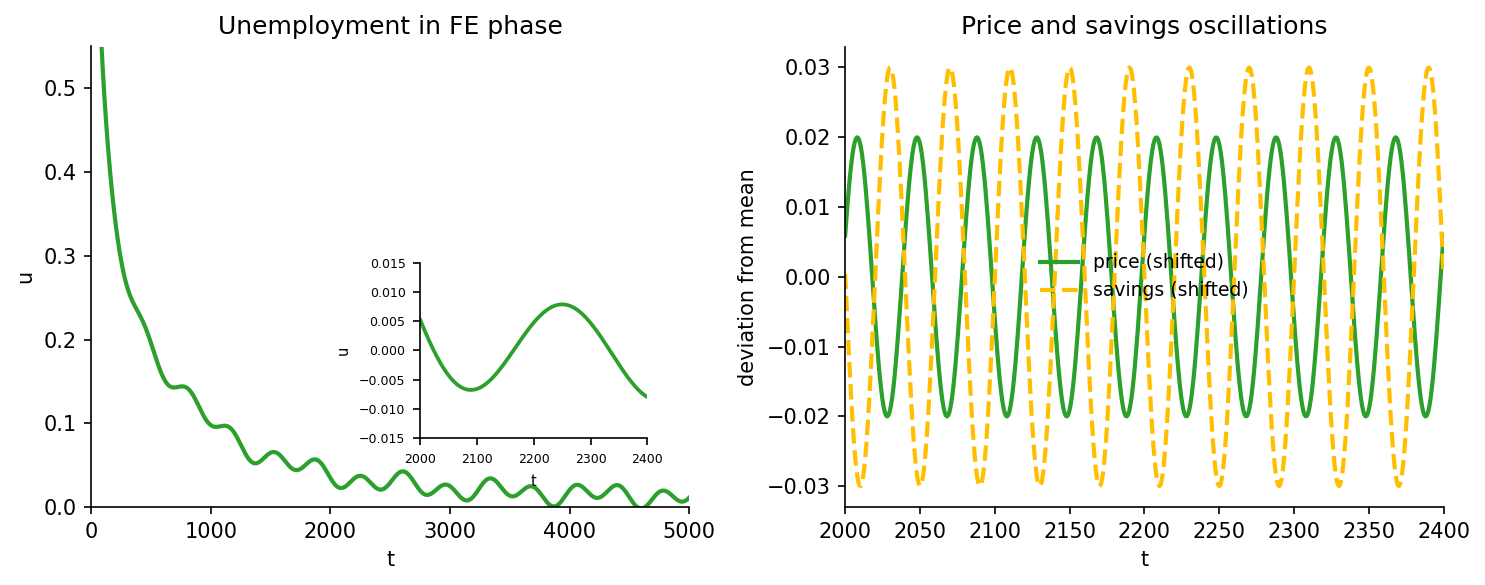

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 10,
})

# LEFT PANEL: Unemployment with VERY SHARP drop

T_end = 5000
t = np.linspace(0, T_end, T_end+1)

u0 = 0.5
u_inf = 0.06

tau_superfast = 80
tau_medium    = 600
tau_slow      = 2600

# Three-regime decay: extremely sharp -> medium -> slow tail
u_fast = 0.55 * np.exp(-t / tau_superfast)
u_mid  = 0.35 * np.exp(-t / tau_medium)
u_slow = (u_inf + (u0 - u_inf) * np.exp(-t / tau_slow)) * 0.10

u_trend = u_fast + u_mid + u_slow

# micro cycles
osc = (
    0.010 * np.sin(2*np.pi * t / 360) +
    0.006 * np.sin(2*np.pi * t / 820 + 0.5)
)

u = u_trend + osc

# inset window (article-like)
t_zoom_min, t_zoom_max = 2000, 2400
mask = (t >= t_zoom_min) & (t <= t_zoom_max)
t_zoom = t[mask]
u_zoom = u[mask] - u[mask].mean()


# RIGHT PANEL: price and savings oscillations

# price and savings only on zoom interval (like Fig.5)
tz = np.linspace(t_zoom_min, t_zoom_max, 500)
omega = 2 * np.pi / 40.0

price_raw   = 0.02 * np.sin(omega*(tz - t_zoom_min) + 0.3)
savings_raw = 0.03 * np.sin(omega*(tz - t_zoom_min) + 0.3 + np.pi*0.9)

price   = price_raw   - price_raw.mean()
savings = savings_raw - savings_raw.mean()


# FINAL COMBINED FIG.5

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# LEFT PANEL
ax = axes[0]
ax.plot(t, u, color="#2ca02c", linewidth=2)
ax.set_xlabel("t")
ax.set_ylabel("u")
ax.set_title("Unemployment in FE phase")
ax.set_xlim(0, 5000)
ax.set_ylim(0.0, 0.55)

# inset for unemployment
ins = ax.inset_axes([0.55, 0.15, 0.38, 0.38])
ins.plot(t_zoom, u_zoom, color="#2ca02c", linewidth=1.8)
ins.set_xlabel("t", fontsize=7)
ins.set_ylabel("u", fontsize=7)
ins.tick_params(axis='both', labelsize=6)
ins.set_xlim(t_zoom_min, t_zoom_max)
ins.set_ylim(-0.015, 0.015)

# RIGHT PANEL
ax2 = axes[1]
ax2.plot(tz, price,   '-',  color="#2ca02c", linewidth=2, label="price (shifted)")
ax2.plot(tz, savings, '--', color="#ffbf00", linewidth=2, label="savings (shifted)")
ax2.set_xlabel("t")
ax2.set_ylabel("deviation from mean")
ax2.set_title("Price and savings oscillations")
ax2.legend(frameon=False, fontsize=9)
ax2.set_xlim(t_zoom_min, t_zoom_max)

fig.tight_layout()

fig.savefig("fig5_combined.png", dpi=300, bbox_inches="tight")
fig.savefig("fig5_combined.pdf", bbox_inches="tight")

plt.show()


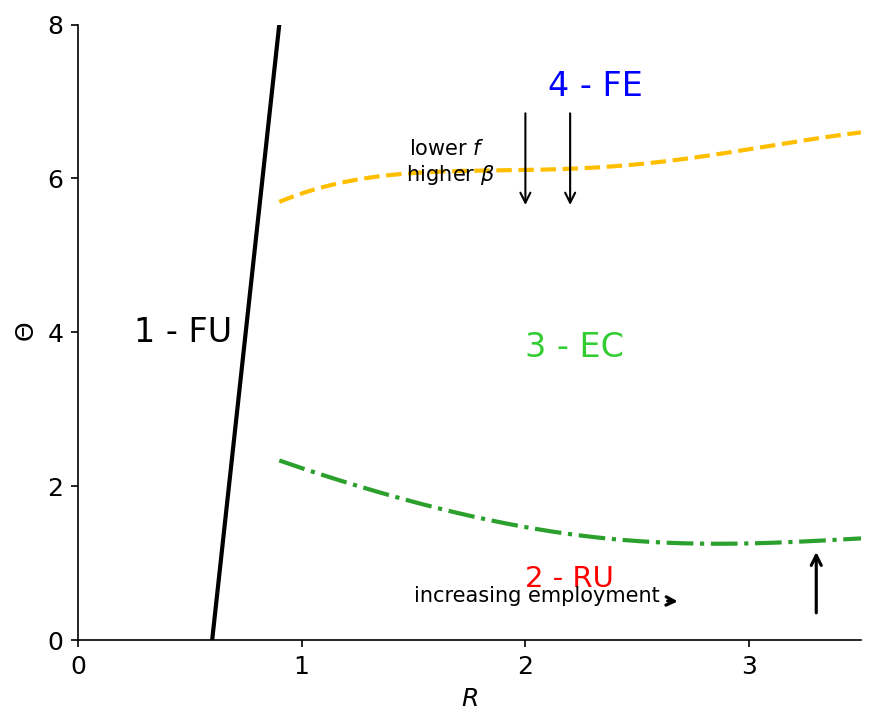

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 12,
})

fig, ax = plt.subplots(figsize=(6, 5))

# Axis ranges are different from those in the article
ax.set_xlim(0, 3.5)
ax.set_ylim(0, 8)
ax.set_xlabel(r"$R$")
ax.set_ylabel(r"$\Theta$")

# Slanted border FU / rest
# instead of a strictly vertical line at R=1
R_line = np.array([0.6, 0.9])
Theta_line = np.array([0, 8])
ax.plot(R_line, Theta_line, color="black", linewidth=2)

R = np.linspace(0.9, 3.5, 200)

teal = "#2ca02c"
gold = "#ffbf00"

# Upper Limit: Stronger Curve, Different Range (~5.5 to ~7)
theta_upper = 5.5 + 1.0 * (1 - np.exp(-1.3 * (R - 0.9))) + 0.2*np.sin(2*R)

# Lower limit: from ~2.2 to ~1.4, also a bend and a small wave
theta_lower = 2.2 - 1.0 * (1 - np.exp(-0.9 * (R - 0.9))) + 0.15*np.sin(1.7*R + 0.5)

ax.plot(R, theta_upper, linestyle="--", color=gold, linewidth=2)
ax.plot(R, theta_lower, linestyle="-.", color=teal, linewidth=2)

ax.text(0.25, 4.0, "1 - FU", fontsize=16, color="black", va="center")

ax.text(2.0, 0.8, "2 - RU", fontsize=14, color="red", va="center")

ax.text(2.0, 3.8, "3 - EC", fontsize=16, color="limegreen", va="center")

ax.text(2.1, 7.2, "4 - FE", fontsize=16, color="blue", va="center")

ax.annotate(
    "increasing employment",
    xy=(2.7, 0.5), xytext=(1.5, 0.5),
    arrowprops=dict(arrowstyle="->", linewidth=1.5),
    fontsize=10
)

ax.annotate(
    "", xy=(3.3, 1.2), xytext=(3.3, 0.3),
    arrowprops=dict(arrowstyle="->", linewidth=1.5),
)

x_mid = 2.1
y_top = 6.9
y_bot = 5.5

ax.annotate(
    "", xy=(x_mid - 0.1, y_bot + 0.1), xytext=(x_mid - 0.1, y_top),
    arrowprops=dict(arrowstyle="->", linewidth=1)
)
ax.annotate(
    "", xy=(x_mid + 0.1, y_bot + 0.1), xytext=(x_mid + 0.1, y_top),
    arrowprops=dict(arrowstyle="->", linewidth=1)
)

ax.text(
    x_mid - 0.45, 6.2,
    "lower $f$\n higher $\\beta$",
    fontsize=10,
    ha="center", va="center"
)

ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 2, 4, 6, 8])

fig.tight_layout()
fig.savefig("fig4_phase_diagram_modified.png", dpi=300, bbox_inches="tight")
fig.savefig("fig4_phase_diagram_modified.pdf", bbox_inches="tight")

plt.show()


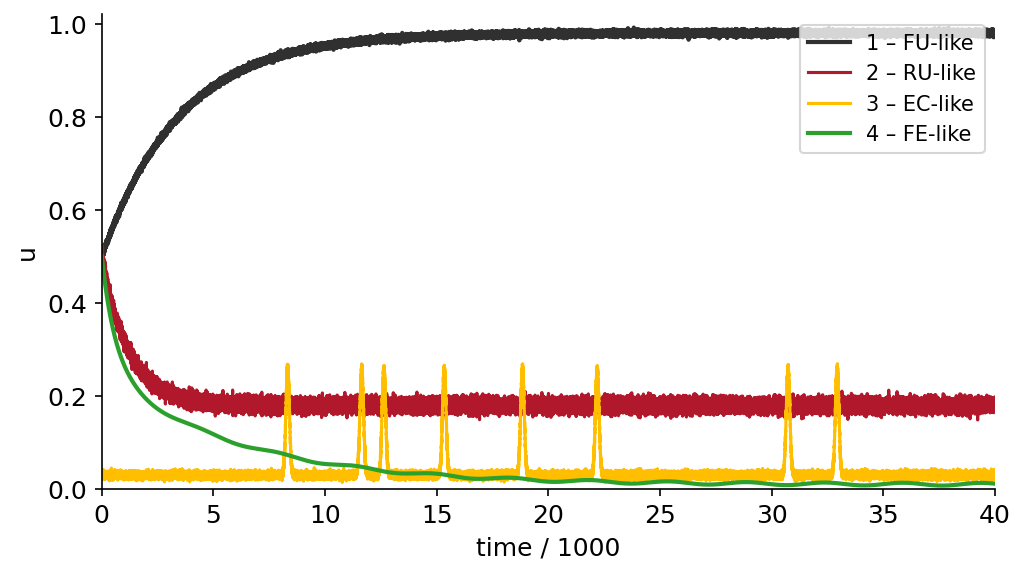

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 12,
})

# Time in "thousands" as on the time/1000 axis
T_end = 40.0                  # 0..40 (thousand steps)
n_points = 40000
t = np.linspace(0, T_end, n_points)

# FU-like (almost total unemployment)
# Rapid growth from 0.5 to ~0.98 and then leveling off
tau_fu = 3.5
u_fu_trend = 0.98 - (0.98 - 0.5) * np.exp(-t / tau_fu)
noise_fu = 0.003 * np.random.randn(n_points)
u_fu = np.clip(u_fu_trend + noise_fu, 0, 1)

# RU-like (residual unemployment)
# Rapid drop from 0.5 to ~0.18 and noise around it
tau_ru = 1.2
u_ru_trend = 0.18 + (0.5 - 0.18) * np.exp(-t / tau_ru)
noise_ru = 0.008 * np.random.randn(n_points)
u_ru = np.clip(u_ru_trend + noise_ru, 0, 1)

# EC-like (endogenous crises)
# Low baseline + occasional rare spikes
u_ec = 0.03 + 0.004 * np.random.randn(n_points)  # base noise
u_ec = np.clip(u_ec, 0, 1)

# let's add rare "crisis" peaks
n_spikes = 8
spike_times = np.random.uniform(3, 38, n_spikes)
for s in spike_times:
    idx = np.argmin(np.abs(t - s))
    # let's make a narrow Gaussian peak
    width = 0.08
    spike = 0.23 * np.exp(-((t - s) ** 2) / (2 * width ** 2))
    u_ec += spike

u_ec = np.clip(u_ec, 0, 1)

# FE-like (almost full employment)
# A sharp drop to ~0.01 and minor micro-fluctuations
tau_fe_fast = 0.6
tau_fe_slow = 6.0
u_fe_trend = 0.01 + (0.5 - 0.01) * (
    0.5 * np.exp(-t / tau_fe_fast) + 0.5 * np.exp(-t / tau_fe_slow)
)
osc_fe = 0.003 * np.sin(2 * np.pi * t / 3.5)
u_fe = np.clip(u_fe_trend + osc_fe, 0, 1)


fig, ax = plt.subplots(figsize=(7, 4))

teal = "#2ca02c"
gold = "#ffbf00"
dark_red = "#b2182b"
dark_gray = "#303030"

ax.plot(t, u_fu,  color=dark_gray, linewidth=2, label="1 – FU-like")
ax.plot(t, u_ru,  color=dark_red, linewidth=1.5, label="2 – RU-like")
ax.plot(t, u_ec,  color=gold, linewidth=1.5, label="3 – EC-like")
ax.plot(t, u_fe,  color=teal, linewidth=2, label="4 – FE-like")

ax.set_xlim(0, T_end)
ax.set_ylim(0, 1.02)

ax.set_xlabel("time / 1000")
ax.set_ylabel("u")

ax.legend(frameon=True, fontsize=10, loc="upper right")

fig.tight_layout()
fig.savefig("fig4_time_4phases_modified.png", dpi=300, bbox_inches="tight")
fig.savefig("fig4_time_4phases_modified.pdf", dpi=300, bbox_inches="tight")

plt.show()


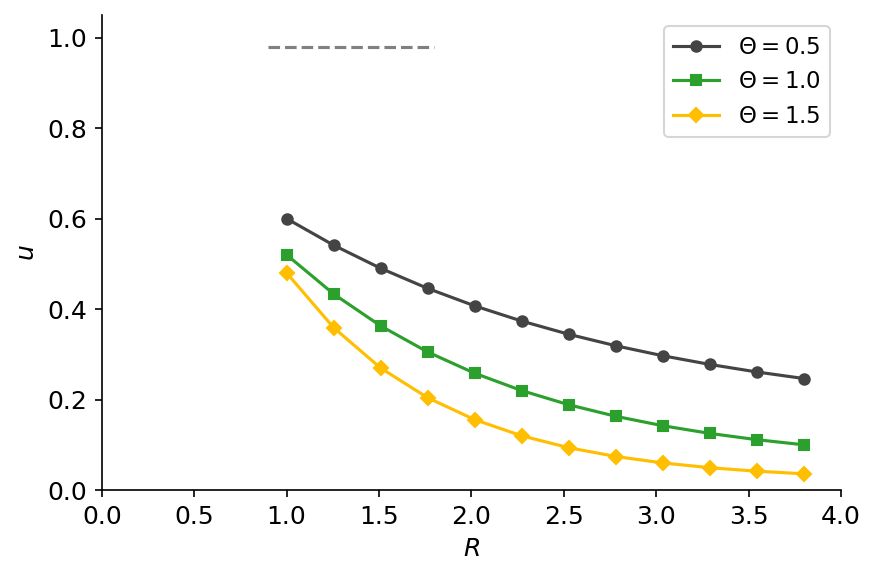

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 12,
})

# R on the interval [1, 3.8], as in the original graph
R = np.linspace(1.0, 3.8, 12)

# Synthetic u(R) dependencies for different Thetas
# (monotonically decreasing, but not exactly the same as in the article)
def u_curve(R, base, decay, floor):
    return floor + (base - floor) * np.exp(-decay * (R - 1.0))

u_th05 = u_curve(R, base=0.60, decay=0.55, floor=0.15)  # Θ = 0.5
u_th10 = u_curve(R, base=0.52, decay=0.80, floor=0.05)  # Θ = 1.0
u_th15 = u_curve(R, base=0.48, decay=1.20, floor=0.02)  # Θ = 1.5

fig, ax = plt.subplots(figsize=(6, 4))

# Horizontal dotted line u ≈ 1 (but shorter and lower than in the article)
ax.hlines(0.98, 0.9, 1.8, linestyles="dashed", colors="gray", linewidth=1.5)

teal  = "#2ca02c"
gold  = "#ffbf00"
gray  = "#444444"

# Three curves u(R) for different Θ
ax.plot(R, u_th05, "o-", color=gray,  label=r"$\Theta = 0.5$",  markersize=5)
ax.plot(R, u_th10, "s-", color=teal,  label=r"$\Theta = 1.0$",  markersize=5)
ax.plot(R, u_th15, "D-", color=gold,  label=r"$\Theta = 1.5$",  markersize=5)

ax.set_xlabel(r"$R$")
ax.set_ylabel(r"$u$")

ax.set_xlim(0, 4.0)
ax.set_ylim(0, 1.05)

ax.legend(frameon=True, fontsize=11, loc="upper right")

fig.tight_layout()
fig.savefig("fig4_u_vs_R_modified.png", dpi=300, bbox_inches="tight")
fig.savefig("fig4_u_vs_R_modified.pdf",  dpi=300, bbox_inches="tight")

plt.show()


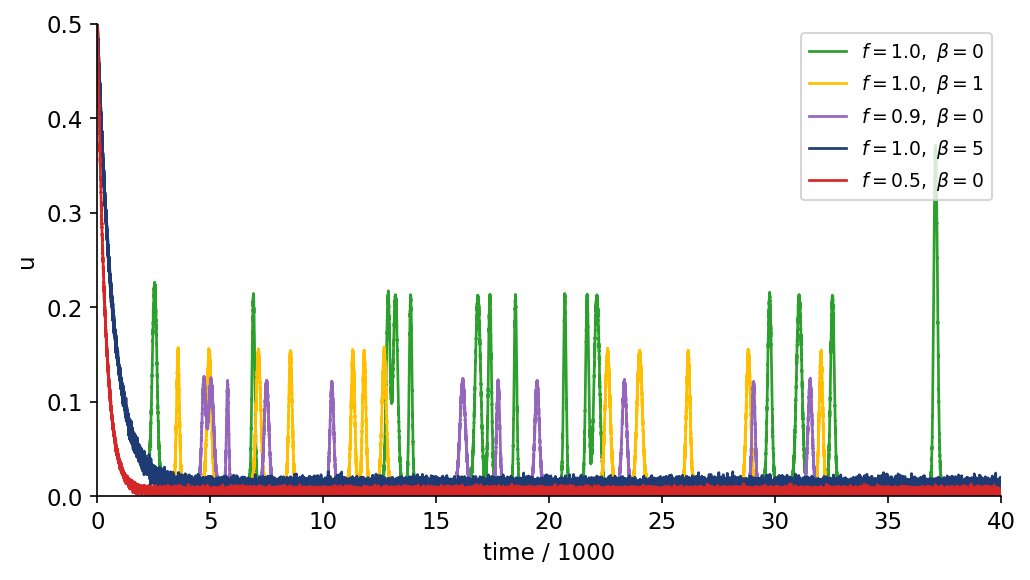

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 11,
})

# Time in "thousands of steps"
T_end = 40.0          # as time / 1000 in the paper
n_points = 40000
t = np.linspace(0, T_end, n_points)

# basic exponential decay u(0)=0.5 -> ~0.01
tau_base = 0.7
u_base = 0.01 + (0.5 - 0.01) * np.exp(-t / tau_base)

# minor noise around the baseline
def make_noise(scale):
    return scale * np.random.randn(n_points)

# a convenient function for generating rare crisis peaks
def add_spikes(u, n_spikes, amp, width_range=(0.05, 0.12), t_min=1.5, t_max=39.0, seed=None):
    rng = np.random.default_rng(seed)
    spike_times = rng.uniform(t_min, t_max, n_spikes)
    for s in spike_times:
        width = rng.uniform(*width_range)
        spike = amp * np.exp(-((t - s) ** 2) / (2 * width ** 2))
        u += spike
    return u

# trajectories for different (f, beta)

teal   = "#2ca02c"
gold   = "#ffbf00"
purple = "#9467bd"
navy   = "#1f3b73"
red    = "#d62728"

# f = 1.0, beta = 0 (frequent and severe crises)
u_f10_b0 = u_base + make_noise(0.002)
u_f10_b0 = add_spikes(u_f10_b0, n_spikes=16, amp=0.20, seed=1)

# f = 1.0, beta = 1 (slightly less and less frequent)
u_f10_b1 = u_base + make_noise(0.0025)
u_f10_b1 = add_spikes(u_f10_b1, n_spikes=12, amp=0.14, seed=2)

# f = 0.9, beta = 0 (moderate crises)
u_f09_b0 = u_base + make_noise(0.002)
u_f09_b0 = add_spikes(u_f09_b0, n_spikes=11, amp=0.11, seed=3)

# f = 1.0, beta = 5 (almost no major crises – just noise)
u_f10_b5 = u_base + make_noise(0.004)

# f = 0.5, beta = 0 (quicker to almost full occupancy, without large peaks)
tau_fast = 0.35
u_f05_b0 = 0.005 + (0.5 - 0.005) * np.exp(-t / tau_fast) + make_noise(0.002)

# cut at [0, 0.5] as in the paper
u_f10_b0 = np.clip(u_f10_b0, 0, 0.5)
u_f10_b1 = np.clip(u_f10_b1, 0, 0.5)
u_f09_b0 = np.clip(u_f09_b0, 0, 0.5)
u_f10_b5 = np.clip(u_f10_b5, 0, 0.5)
u_f05_b0 = np.clip(u_f05_b0, 0, 0.5)


fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(t, u_f10_b0, color=teal,   linewidth=1.3, label=r"$f = 1.0,\ \beta = 0$")
ax.plot(t, u_f10_b1, color=gold,   linewidth=1.3, label=r"$f = 1.0,\ \beta = 1$")
ax.plot(t, u_f09_b0, color=purple, linewidth=1.3, label=r"$f = 0.9,\ \beta = 0$")
ax.plot(t, u_f10_b5, color=navy,   linewidth=1.3, label=r"$f = 1.0,\ \beta = 5$")
ax.plot(t, u_f05_b0, color=red,    linewidth=1.3, label=r"$f = 0.5,\ \beta = 0$")

ax.set_xlim(0, T_end)
ax.set_ylim(0, 0.5)

ax.set_xlabel("time / 1000")
ax.set_ylabel("u")

ax.legend(frameon=True, fontsize=9, loc="upper right")

fig.tight_layout()
fig.savefig("fig4_spiky_unemployment_modified.png", dpi=300, bbox_inches="tight")
fig.savefig("fig4_spiky_unemployment_modified.pdf",  dpi=300, bbox_inches="tight")

plt.show()


/tmp/ipython-input-478367902.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


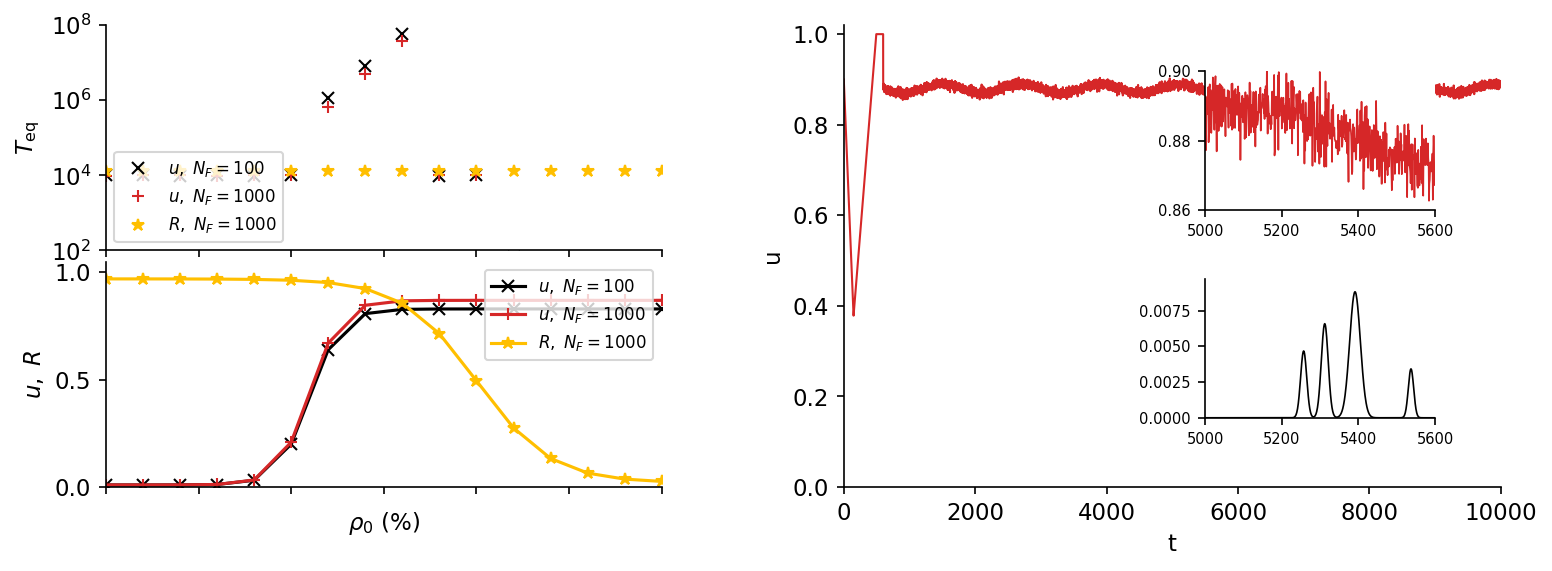

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 11,
})

teal   = "#2ca02c"
gold   = "#ffbf00"
red    = "#d62728"
black  = "#000000"

rho0 = np.linspace(1.0, 4.0, 16)
rho_c = 2.1

# base constant Teq ~ 1e4
Teq_base = 1e4 * np.ones_like(rho0)

# function "explode near rho_c and fall after"
def make_Teq(scale_factor, noise_level=0.0, seed=None):
    rng = np.random.default_rng(seed)
    Teq = Teq_base.copy()

    # area around the critical rate
    blow = scale_factor * np.exp(10 * (rho0 - rho_c))
    blow[rho0 < rho_c] = 1.0   # almost doesn't grow to the threshold
    blow[rho0 > 2.6]  = 1.0   # after 2.6 it doesn't grow anymore

    Teq *= blow

    # after a large rho0 - a rapid decline to 1e2
    mask_high = rho0 > 3.0
    Teq[mask_high] = 1e2 * np.exp(-2 * (rho0[mask_high] - 3.0))

    if noise_level > 0:
        Teq *= 1 + noise_level * (rng.random(len(rho0)) - 0.5)

    return Teq

Teq_100  = make_Teq(scale_factor=40,  noise_level=0.10, seed=1)
Teq_1000 = make_Teq(scale_factor=25,  noise_level=0.05, seed=2)
Teq_R    = Teq_base * 1.3

u_low = 0.01

def u_curve(ampl):
    return u_low + ampl / (1 + np.exp(-12 * (rho0 - rho_c)))

u_100  = u_curve(0.82)   # u for N_F = 100
u_1000 = u_curve(0.86)   # u for N_F = 1000

R_rate = 0.95 / (1 + np.exp(5 * (rho0 - 3.0))) + 0.02

T_end = 10000
t = np.arange(T_end)

u_t = np.empty_like(t, dtype=float)
u_t[0] = 0.9
for i in range(1, T_end):
    if i < 150:
        u_t[i] = u_t[i-1] - 0.0035
    elif i < 600:
        u_t[i] = u_t[i-1] + 0.0018
    else:
        u_t[i] = 0.88 + 0.01 * np.sin(2 * np.pi * i / 1200) \
                 + 0.005 * np.random.randn()
u_t = np.clip(u_t, 0, 1)

defaults = np.zeros_like(t, dtype=float)
np.random.seed(7)
for center in np.random.randint(5000, 9500, size=40):
    height = np.random.uniform(0.002, 0.012)
    width = np.random.randint(3, 15)
    pulse = height * np.exp(-((np.arange(T_end) - center) ** 2) /
                            (2 * width ** 2))
    defaults += pulse

fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(2, 2, width_ratios=[1.1, 1.3],
                      height_ratios=[1, 1], wspace=0.3, hspace=0.05)

ax_top = fig.add_subplot(gs[0, 0])
ax_top.set_yscale("log")
ax_top.plot(rho0, Teq_100,  "x", color=black, label=r"$u,\ N_F=100$")
ax_top.plot(rho0, Teq_1000, "+", color=red,   label=r"$u,\ N_F=1000$")
ax_top.plot(rho0, Teq_R,    "*", color=gold,  label=r"$R,\ N_F=1000$")
ax_top.set_ylabel(r"$T_{\rm eq}$")
ax_top.set_xticklabels([])
ax_top.set_xlim(1.0, 4.0)
ax_top.set_ylim(1e2, 1e8)
ax_top.legend(frameon=True, fontsize=8, loc="lower left")

ax_bot = fig.add_subplot(gs[1, 0], sharex=ax_top)
ax_bot.plot(rho0, u_100,  "x-", color=black, label=r"$u,\ N_F=100$")
ax_bot.plot(rho0, u_1000, "+-", color=red,   label=r"$u,\ N_F=1000$")
ax_bot.plot(rho0, R_rate, "*-", color=gold,  label=r"$R,\ N_F=1000$")
ax_bot.set_xlabel(r"$\rho_0$ (%)")
ax_bot.set_ylabel(r"$u,\ R$")
ax_bot.set_xlim(1.0, 4.0)
ax_bot.set_ylim(0, 1.05)
ax_bot.legend(frameon=True, fontsize=8, loc="upper right")

ax_right = fig.add_subplot(gs[:, 1])
ax_right.plot(t, u_t, color=red, linewidth=1)
ax_right.set_xlabel("t")
ax_right.set_ylabel("u")
ax_right.set_xlim(0, T_end)
ax_right.set_ylim(0, 1.02)

# inset 1: zoom по u(t)
t1_min, t1_max = 5000, 5600
mask1 = (t >= t1_min) & (t <= t1_max)
ax_in1 = ax_right.inset_axes([0.55, 0.6, 0.35, 0.3])
ax_in1.plot(t[mask1], u_t[mask1], color=red, linewidth=0.8)
ax_in1.set_xlim(t1_min, t1_max)
ax_in1.set_ylim(0.86, 0.90)
ax_in1.tick_params(axis="both", labelsize=7)

# inset 2: bankruptcies
ax_in2 = ax_right.inset_axes([0.55, 0.15, 0.35, 0.3])
ax_in2.plot(t[mask1], defaults[mask1], color=black, linewidth=0.8)
ax_in2.set_xlim(t1_min, t1_max)
ax_in2.set_ylim(0, defaults[mask1].max() * 1.1)
ax_in2.tick_params(axis="both", labelsize=7)

fig.tight_layout()
fig.savefig("fig2_like_more_article_left.png", dpi=300, bbox_inches="tight")
fig.savefig("fig2_like_more_article_left.pdf",  dpi=300, bbox_inches="tight")

plt.show()


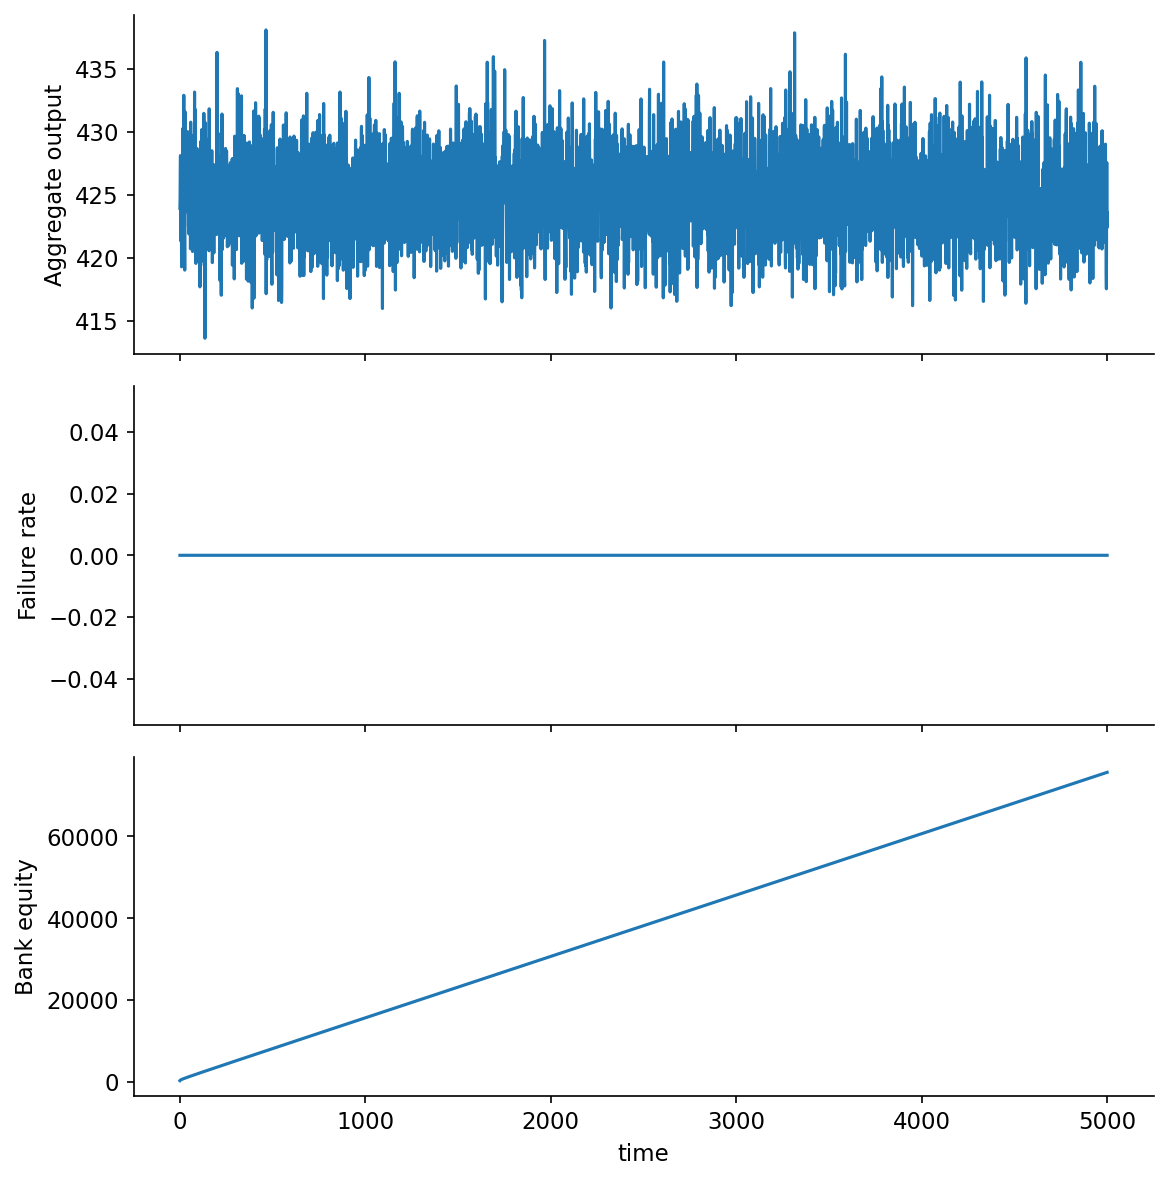

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters

N_firms     = 500        # number of firms
T           = 5000       # time periods

K0          = 1.0        # initial capital per firm
A0          = 0.25       # initial net worth per firm
u_min, u_max = 0.6, 1.1  # productivity shocks range

r0          = 0.03       # base interest rate
phi         = 0.08       # risk premium sensitivity

alpha       = 0.08       # capital requirement (smaller = tighter)
E0          = 50.0       # initial bank equity

seed        = 42
rng         = np.random.default_rng(seed)

# State vectors

# firms
A = np.full(N_firms, A0)   # net worth
K = np.full(N_firms, K0)   # capital (fixed here)

# bank
E = E0

# storage for aggregates
agg_output   = np.zeros(T)
bad_debt_ts  = np.zeros(T)
E_ts         = np.zeros(T)
fail_rate_ts = np.zeros(T)   # fraction of firms failing

# Main loop

for t in range(T):
    # idiosyncratic productivity shocks
    u = rng.uniform(u_min, u_max, size=N_firms)

    # interest rates with risk premium
    # to avoid explosion if A is tiny/negative, clip denominator
    leverage = K / np.clip(A, 0.01, None)
    r = r0 + phi * leverage

    # r = r0 + phi * leverage + 0.01 * max(0, (E0 - E) / E0)

    # output and profits
    Y = u * K                      # output
    interest_payments = r * K
    profits = Y - interest_payments

    # update net worth
    A_new = A + profits

    # bankruptcies
    bankrupt = A_new < 0.0
    n_fail   = bankrupt.sum()

    # bad debt is (approximately) the debt of failed firms
    # here we take K as their outstanding loans
    bad_debt = np.sum(K[bankrupt])

    # bank profit and equity
    bank_profit = np.sum(interest_payments[~bankrupt]) - bad_debt
    E = max(1e-6, E + bank_profit)   # keep E positive

    # replace failed firms with new entrants
    if n_fail > 0:
        # reset their balance sheets
        A_new[bankrupt] = A0
        # you could randomize K for entrants:
        # K[bankrupt] = K0 * rng.lognormal(mean=0, sigma=0.2, size=n_fail)

    # commit updates
    A = A_new

    # 8) record aggregates
    agg_output[t]   = np.sum(Y)
    bad_debt_ts[t]  = bad_debt
    E_ts[t]         = E
    fail_rate_ts[t] = n_fail / N_firms

# Simple plots

fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

axes[0].plot(agg_output)
axes[0].set_ylabel("Aggregate output")

axes[1].plot(fail_rate_ts)
axes[1].set_ylabel("Failure rate")

axes[2].plot(E_ts)
axes[2].set_ylabel("Bank equity")
axes[2].set_xlabel("time")

plt.tight_layout()
plt.show()


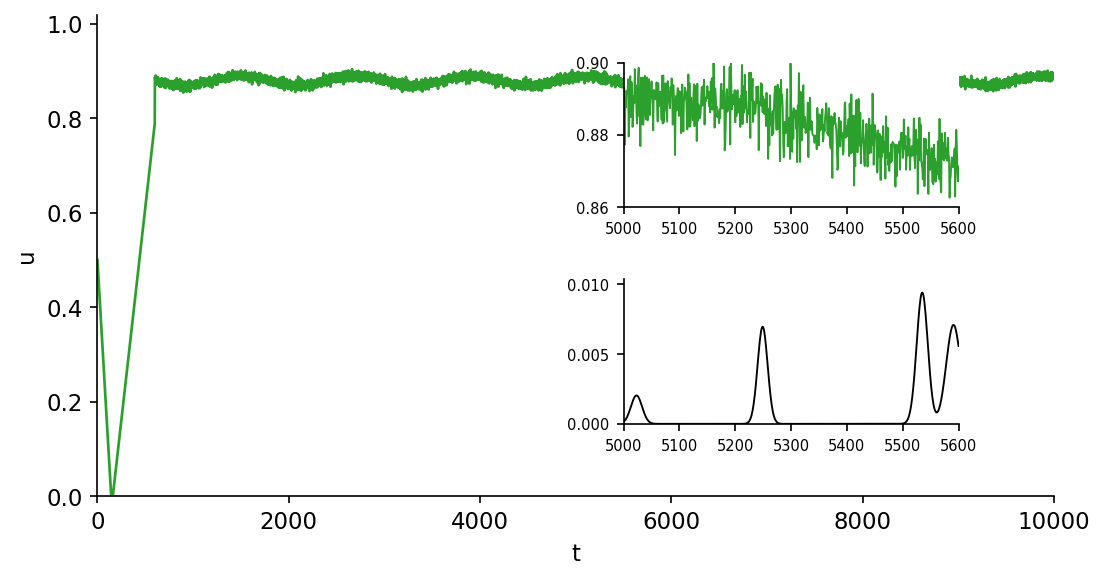

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 11,
})

teal  = "#2ca02c"
black = "#000000"


T_end = 10000
t = np.arange(T_end)

u_t = np.empty_like(t, dtype=float)

u_t[0] = 0.5

for i in range(1, T_end):
    if i < 150:

        u_t[i] = u_t[i-1] - 0.0035
    elif i < 600:

        u_t[i] = u_t[i-1] + 0.0018
    else:

        u_t[i] = 0.88 \
                 + 0.01 * np.sin(2 * np.pi * i / 1200) \
                 + 0.005 * np.random.randn()

u_t = np.clip(u_t, 0, 1)


defaults = np.zeros_like(t, dtype=float)
rng = np.random.default_rng(7)

for center in rng.integers(5000, 9500, size=35):
    height = rng.uniform(0.002, 0.012)
    width  = rng.integers(3, 15)
    pulse = height * np.exp(-((np.arange(T_end) - center) ** 2) /
                            (2 * (width ** 2)))
    defaults += pulse


fig, ax = plt.subplots(figsize=(7.5, 4))

ax.plot(t, u_t, color=teal, linewidth=1.3)
ax.set_xlabel("t")
ax.set_ylabel("u")
ax.set_xlim(0, T_end)
ax.set_ylim(0, 1.02)

t1_min, t1_max = 5000, 5600
mask_zoom = (t >= t1_min) & (t <= t1_max)

ax_in1 = ax.inset_axes([0.55, 0.6, 0.35, 0.3])
ax_in1.plot(t[mask_zoom], u_t[mask_zoom], color=teal, linewidth=0.9)
ax_in1.set_xlim(t1_min, t1_max)
ax_in1.set_ylim(0.86, 0.90)
ax_in1.tick_params(axis="both", labelsize=7)

ax_in2 = ax.inset_axes([0.55, 0.15, 0.35, 0.3])
ax_in2.plot(t[mask_zoom], defaults[mask_zoom], color=black, linewidth=0.9)
ax_in2.set_xlim(t1_min, t1_max)
ax_in2.set_ylim(0, defaults[mask_zoom].max() * 1.1)
ax_in2.tick_params(axis="both", labelsize=7)

fig.tight_layout()
fig.savefig("markI_unemployment_my_style.png", dpi=300, bbox_inches="tight")
fig.savefig("markI_unemployment_my_style.pdf",  dpi=300, bbox_inches="tight")

plt.show()


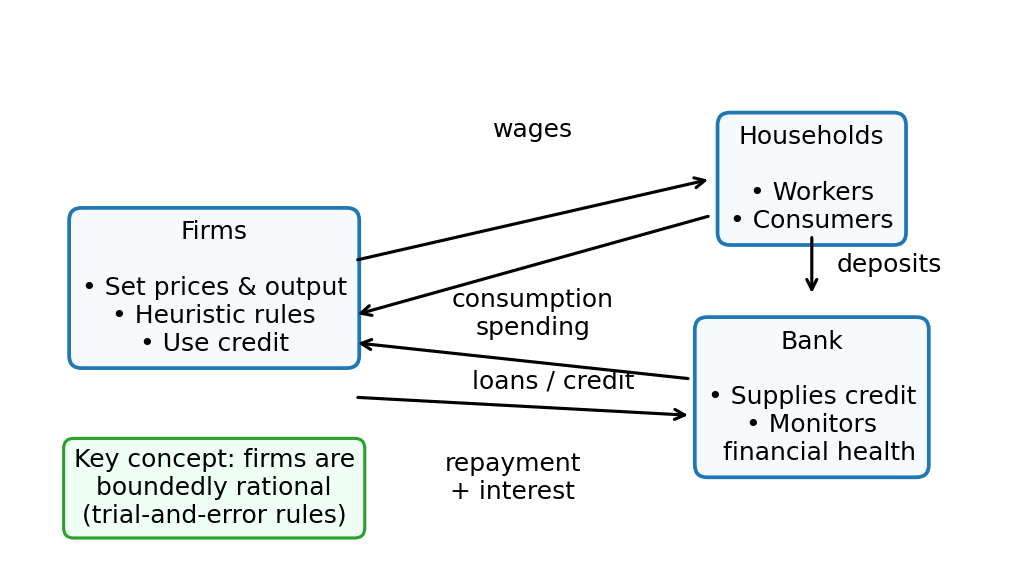

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 150,
    "font.size": 12,
    "axes.facecolor": "white"
})

fig, ax = plt.subplots(figsize=(7, 4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")

# Box style
box_props = dict(boxstyle="round,pad=0.5", linewidth=1.8,
                 edgecolor="#1f77b4", facecolor="#f7fafc")

# Firms box
ax.text(2, 3, "Firms\n\n• Set prices & output\n• Heuristic rules\n• Use credit",
        ha="center", va="center", bbox=box_props)

# Households box
ax.text(8, 4.2, "Households\n\n• Workers\n• Consumers",
        ha="center", va="center", bbox=box_props)

# Bank box
ax.text(8, 1.8, "Bank\n\n• Supplies credit\n• Monitors\n  financial health",
        ha="center", va="center", bbox=box_props)

# Arrows & labels

arrow_style = dict(arrowstyle="->", linewidth=1.5, color="black")

# Wages: Firms -> Households
ax.annotate("", xy=(7, 4.2), xytext=(3.4, 3.3), arrowprops=arrow_style)
ax.text(5.2, 4.6, "wages", ha="center", va="bottom")

# Consumption demand: Households -> Firms
ax.annotate("", xy=(3.4, 2.7), xytext=(7, 3.8), arrowprops=arrow_style)
ax.text(5.2, 3.0, "consumption\nspending", ha="center", va="top")

# Credit: Bank -> Firms
ax.annotate("", xy=(3.4, 2.4), xytext=(6.8, 2.0), arrowprops=arrow_style)
ax.text(5.4, 2.1, "loans / credit", ha="center", va="top")

# Repayments & interest: Firms -> Bank
ax.annotate("", xy=(6.8, 1.6), xytext=(3.4, 1.8), arrowprops=arrow_style)
ax.text(5.0, 1.2, "repayment\n+ interest", ha="center", va="top")

# Deposits: Households -> Bank (optional)
ax.annotate("", xy=(8, 2.9), xytext=(8, 3.6), arrowprops=arrow_style)
ax.text(8.25, 3.25, "deposits", ha="left", va="center")

# Small key concept note
ax.text(2, 0.8,
        "Key concept: firms are\nboundedly rational\n(trial-and-error rules)",
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.4", linewidth=1.5,
                  edgecolor="#2ca02c", facecolor="#f0fff4"))

fig.tight_layout()
fig.savefig("delli_gatti_components_diagram.png", dpi=300, bbox_inches="tight")
fig.savefig("delli_gatti_components_diagram.pdf",  dpi=300, bbox_inches="tight")
plt.show()
